# Demonstration of chebroots

## Defining the function

First, we must define a function that has **many** roots that cannot easily be found.

In this example, let us use (somewhat arbitrarily)
$$
y(x) = \cos(\exp(\sin(x^2)))^2 - \cos(\exp(\sin(x^3)))^2 + \sin(\cos(\exp(x)))^2
$$
and plot this in the interval $[-5, +10]$.

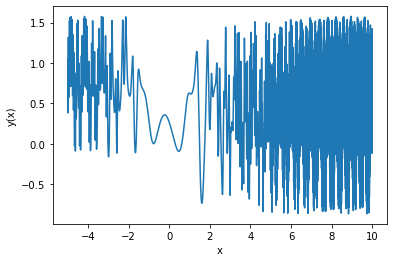

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# definition
fn = np.vectorize(lambda x: np.cos(np.exp(np.sin(x**2)))**2 - np.cos(np.exp(np.sin(x**3)))**2 + np.sin(np.cos(np.exp(x)))**2)
x_interval = [-5, +10]

# show
x = np.linspace(*x_interval, 100000)
plt.plot(x, fn(x))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

## First attempt using chebpy

[chebpy](https://github.com/chebpy/chebpy) is a Python implementation of the popular MATLAB package [Chebfun](https://chebfun.org), which enables numerical computing with functions based on interpolation with Chebyshev polynomials.

This is, in principal, well-suited for such problems and can be done as follows:

In [2]:
from chebpy import chebfun

print("Constructing the Chebyshev representation ...")
cheb = chebfun(fn, x_interval)

print("Locating the roots ...")
x0_chebfun = cheb.roots()

print(f"Found {len(x0_chebfun):d} roots using chebpy:")
print(x0_chebfun)

Constructing the Chebyshev representation ...


/opt/homebrew/Caskroom/miniforge/base/envs/chebroots-dev/lib/python3.8/site-packages/chebpy/core/algorithms.py:229: UserWarning: The Chebtech2 constructor did not converge: using 65537 points
  warnings.warn('The {} constructor did not converge: '\


Locating the roots ...
Found 5404 roots using chebpy:
[-4.67394694 -4.66258742 -4.63038898 ...  9.99446476  9.99460056
  9.99460406]


The warning in the output tells us that the automatic constructor failed to converge the function. This means that the subsequent call to the `.roots` method may not contain all roots in the interval. 

## Improved root finding with chebroots

`chebroots` uses `chebpy` under the hood to interpolate the function efficiently and accurately, but employs recursion to refine the search where needed and thus ensure convergence. It follows a very similar workflow to what was done above:

In [3]:
from chebroots import ChebRoots

print("Initializing the ChebRoots object ...")
rootfinder = ChebRoots(fn)
# optionally, set custom tolerances now

print("Locating the roots ...")
x0_chebroots, _ = rootfinder.find_all_roots(x_interval)

print(f"Found {len(x0_chebroots)} roots using chebroots:")
print(np.array(x0_chebroots))  # use numpy for better formatting

Initializing the ChebRoots object ...
Locating the roots ...


/Users/jan/Software/GitHub/Python-packages/chebroots/src/chebroots/fitting.py:39: UserWarning: Interpolation with chebfun in the interval [-5, 10] failed to converge when using the automatic constructor. Approximating using a fixed number of points (1000).
  warnings.warn(


Found 5968 roots using chebroots:
[-4.67396204 -4.66258254 -4.63038569 ...  9.99446493  9.99460009
  9.99460452]


Note that we also get a warning about failure to converge the function. However, `chebroots` safely ignores this and lets us know that in the given interval (in this case the initial fit over the entire domain) the function is approximated using 1000 points. This is sufficiently accurate but in any case should not affect the roots due to the further refinement later on in the root finding process.